## Update of Matrix inversion using Woodburys formula

- With have a matrix A of which we know the inverse. 
- We modify n^{k} lines 
- By using [Woodbury's formula][1] We can compute the new inverse by performing:
    1. two multiplications of $n\times n^{k}$ by $n^{k} \times n$ matrices
    2. one multiplication of $n\times n^k$ by $n^k\times n^k$. 
    3. one multiplicatin of $n\times n^{k}$ by $n^{k} \times n$.

By [this post][MO], the first can be done in $n^{2+k(\omega-2)}$ (and therefore the second also. In fact, by [this paper][98] it can be done even faster: for $k=0.5$ it can be done in $O(n^{3.334/2})$). By [this paper][FMM], the last can be done in $\omega(k)<\omega$. Hence, computing the new inverse can be done in **at most** $O(n^{2+k(\omega-2)})$.

[1]:   https://en.m.wikipedia.org/wiki/Woodbury_matrix_identity
[FMM]: https://epubs.siam.org/doi/pdf/10.1137/1.9781611975031.67
[98]:  https://www.sciencedirect.com/science/article/pii/S0885064X98904769
[MO]:  https://mathoverflow.net/questions/402508/complexity-of-rectangular-matrix-multiplication

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#Table from https://epubs.siam.org/doi/pdf/10.1137/1.9781611975031.67
omegak = np.array([[0,2],
               [0.31389,2],
[0.32,2.000064],
[0.33,2.000448],
[0.34,2.001118],
[0.35,2.001957],
[0.40,2.010314],
[0.45,2.024801],
[0.50,2.044183],
[0.5286,2.057085],
[0.55,2.067488],
[0.60,2.093981],
[0.65,2.123097],
[0.70,2.154399],
[0.75,2.187543],
[0.80,2.222256],
[0.85,2.258317],
[0.90,2.295544],
[0.95,2.333789],
[1.00,2.372927]])

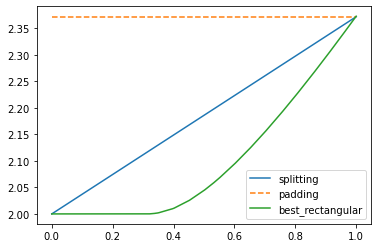

In [11]:
k = np.linspace(0,1,200)
omega = 2.372

padding = 0*k+omega
splitting = 2+k*(omega-2)
best_rectangular = np.interp(k, omegak[:,0], omegak[:,1])

plt.plot(k, splitting, label="splitting")
plt.plot(k, padding, '--', label="padding")
plt.plot(k, best_rectangular, label='best_rectangular')
plt.legend()

## Application to Whittle

To compute Whittle, we can do:
- one inversion of a matrix of size $n\times n$ at the beginning. 
- $n^{1-\alpha}$ updates of these inversions (every $n^{\alpha}$ steps).
- $O(n^{1+2\alpha})$ computations in between.

Denoting by $\omega$ the exponent of the complexity of one inverse and by $u(\alpha)$ the one of the update, we get a complexity of $O(c(\alpha))$, where 
$$C(\alpha) = \max (\omega,  (1-\alpha)+u(\alpha), 2+\alpha)$$
If $u(\alpha)\le 2+2(\omega-2)$, then $3+\alpha (\omega-3)$, which leads to:

$$ \min_\alpha C(\alpha) \le 2+\frac{1}{4-\omega}<2.615$$

## Improvement 

From https://www.sciencedirect.com/science/article/pii/S0885064X98904769 it seems that the complexity of multiplying a $n\times n^k$ by a $n^k \times n$ matrix is the same as the complexity of multiplying a $n\times n$ by a $n\times n^k$. This would say that commputing the "updated" inverse can be done in $O(n^{\omega(k)})$.

This would say that the complexity of the computation of Whittle would to choose $\alpha$ such that $2+\alpha=(1-\alpha)+\omega(\alpha)$.

According to https://people.csail.mit.edu/virgi/6.890/papers/legallurrutia.pdf, this would give a complexity for Whittle of less than $n^{2.5286}$.

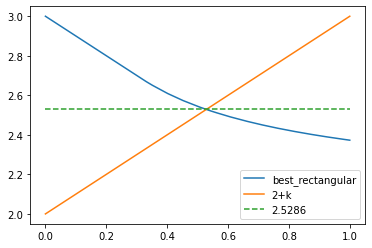

In [15]:
plt.plot(k, 1-k+best_rectangular, label='best_rectangular')
plt.plot(k, 2+k, label='2+k')
plt.plot(k,k*0+2.5286, '--', label='2.5286')
plt.legend()
